Link to dataset:https://archive-beta.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

#### Importing required libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score, roc_curve, auc, make_scorer
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

#### Loading Data

In [4]:
data = pd.read_csv("/content/online_shoppers_intention.csv")

In [5]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


The dataset consists of 12,330 instances, each containing various features such as Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, OperatingSystems, Browser, Region, and TrafficType.

The mean values for the features are as follows: Administrative (2.315166), Administrative_Duration (80.818611), Informational (0.503569), Informational_Duration (34.472398), ProductRelated (31.731468), ProductRelated_Duration (1194.746220), BounceRates (0.022191), ExitRates (0.043073), PageValues (5.889258), SpecialDay (0.061427), OperatingSystems (2.124006), Browser (2.357097), Region (3.147364), and TrafficType (4.069586).

The standard deviations for the features are: Administrative (3.321784), Administrative_Duration (176.779107), Informational (1.270156), Informational_Duration (140.749294), ProductRelated (44.475503), ProductRelated_Duration (1913.669288), BounceRates (0.048488), ExitRates (0.048597), PageValues (18.568437), SpecialDay (0.198917), OperatingSystems (0.911325), Browser (1.717277), Region (2.401591), and TrafficType (4.025169).

The minimum values observed in the dataset are: Administrative (0), Administrative_Duration (0), Informational (0), Informational_Duration (0), ProductRelated (0), ProductRelated_Duration (0), BounceRates (0), ExitRates (0), PageValues (0), SpecialDay (0), OperatingSystems (1), Browser (1), Region (1), and TrafficType (1).

The 25th percentile values indicate that 25% of the instances have values equal to or below the following: Administrative (0), Administrative_Duration (0), Informational (0), Informational_Duration (0), ProductRelated (7), ProductRelated_Duration (184.137500), BounceRates (0), ExitRates (0.014286), PageValues (0), SpecialDay (0), OperatingSystems (2), Browser (2), Region (1), and TrafficType (2).

The median (50th percentile) values for the features are: Administrative (1), Administrative_Duration (7.5), Informational (0), Informational_Duration (0), ProductRelated (18), ProductRelated_Duration (598.936905), BounceRates (0.003112), ExitRates (0.025156), PageValues (0), SpecialDay (0), OperatingSystems (2), Browser (2), Region (3), and TrafficType (2).

The 75th percentile values indicate that 75% of the instances have values equal to or below the following: Administrative (4), Administrative_Duration (93.256250), Informational (0), Informational_Duration (0), ProductRelated (38), ProductRelated_Duration (1464.157214), BounceRates (0.016813), ExitRates (0.050000), PageValues (0), SpecialDay (0), OperatingSystems (3), Browser (2), Region (4), and TrafficType (4).

The maximum values observed in the dataset are: Administrative (27), Administrative_Duration (3398.750000), Informational (24), Informational_Duration (2549.375000)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

It can be observed that the dataset consists of 18 columns, each representing different attributes of the web browsing behavior of the visitors. The dataset contains a total of 12,330 instances, and each column has a non-null count of 12,330, indicating that there are no missing values in the dataset.

The dataset includes various types of variables, such as integer, float, object, and boolean. The integer and float columns, such as "Administrative," "Administrative_Duration," "Informational," "Informational_Duration," "ProductRelated," and "ProductRelated_Duration," represent numerical features related to the visitor's interaction with different sections of the website. The "BounceRates" and "ExitRates" columns indicate the rates at which visitors bounce off or exit the website. The "PageValues" column represents the average value of the pages viewed by the visitors. The "SpecialDay" column denotes the closeness of the visit to a special day or holiday.

The dataset also includes categorical variables, such as the "Month" column representing the month of the visit and the "VisitorType" column indicating whether the visitor is a returning or new visitor. The boolean columns "Weekend" and "Revenue" represent whether the visit occurred on a weekend and whether the visitor made a purchase, respectively.



In [8]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

No null values in data

In [9]:
data.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
19,0,0.0,0,0.0,20,2981.166667,0.00000,0.010000,0.000000,0.0,Feb,2,4,4,4,Returning_Visitor,False,False
1872,1,40.0,0,0.0,15,839.500000,0.01875,0.054167,0.000000,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
6583,6,189.8,0,0.0,9,208.833333,0.00000,0.015385,70.316351,0.0,Nov,2,2,3,2,New_Visitor,False,True
2753,0,0.0,0,0.0,2,3.000000,0.10000,0.150000,0.000000,0.0,May,2,2,4,13,Returning_Visitor,False,False
385,0,0.0,0,0.0,2,254.000000,0.00000,0.100000,0.000000,0.0,Mar,3,2,4,1,Returning_Visitor,False,False


In [10]:
data.corr()

<ipython-input-10-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


Firstly, the variables "Administrative" and "Administrative_Duration" exhibit a moderate positive correlation of 0.601583. This suggests that as the number of administrative pages visited by the user increases, the corresponding duration of their visit also tends to increase.

Secondly, the variables "BounceRates" and "ExitRates" show a strong positive correlation of 0.913004. This indicates that if the bounce rate (the percentage of visitors who leave the website after viewing a single page) is high, the exit rate (the percentage of visitors who exit the website from a specific page) is also likely to be high.

Additionally, the variable "PageValues" exhibits a positive correlation of 0.492569 with the "Revenue" variable. This implies that as the page value (the average value of the page visited by the user) increases, there is a higher chance of generating revenue.

Furthermore, the variable "SpecialDay" shows a weak negative correlation of -0.082305 with the "Revenue" variable. This suggests that if the user visits the website on a special day (e.g., holiday or weekend), there is a slightly lower likelihood of generating revenue.

### EDA

<ipython-input-11-22ccabe177f8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)


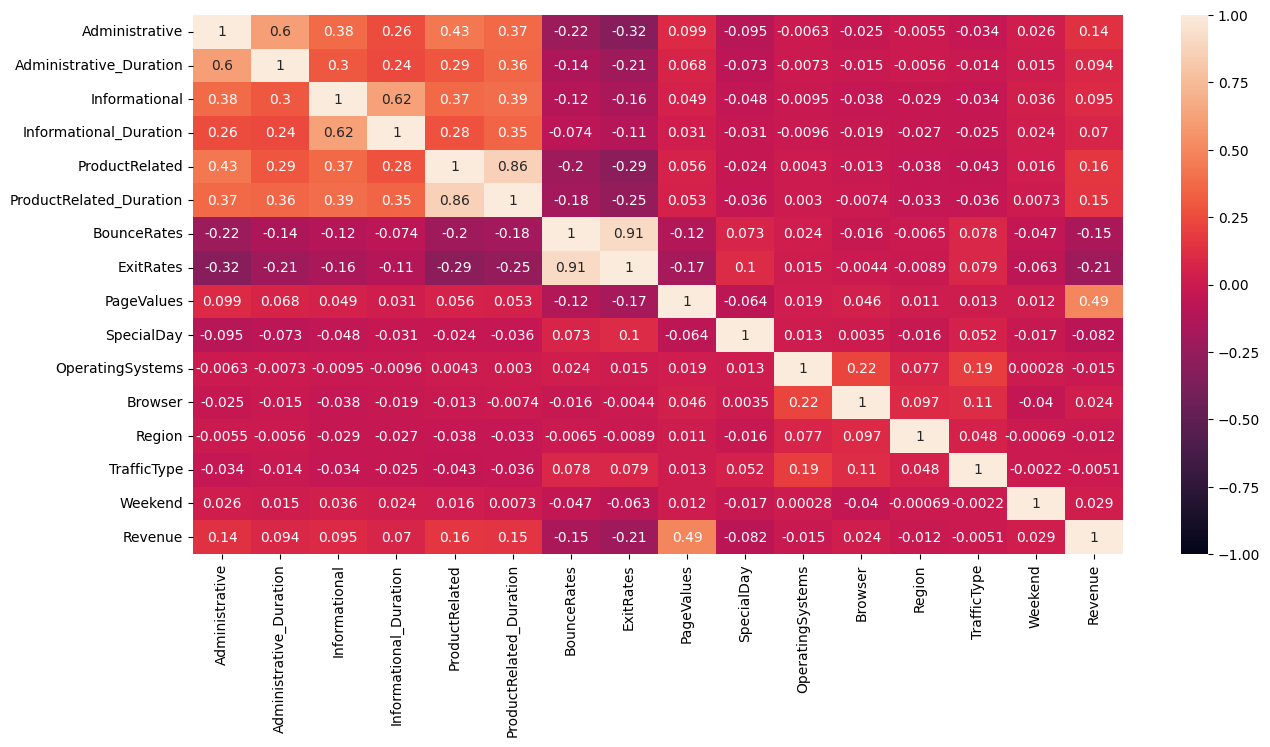

In [11]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [13]:
# sns.pairplot(data, hue="Revenue")
# plt.show()

<Axes: xlabel='Revenue', ylabel='count'>

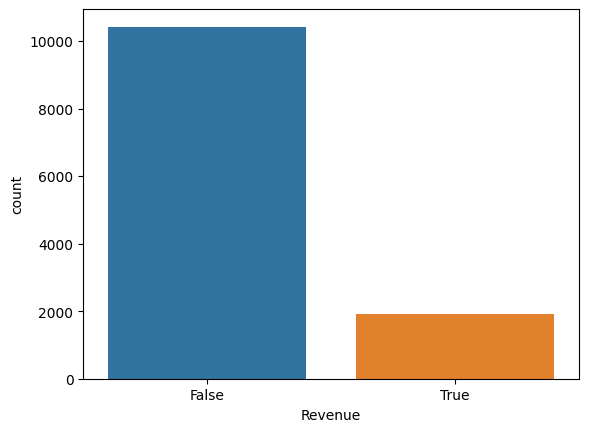

In [14]:
sns.countplot(x='Revenue',data=data)

In [15]:
false_count=data.groupby('Revenue')['Administrative'].count()[0]
true_count=data.groupby('Revenue')['Administrative'].count()[1]
per_success=(true_count/false_count)*100
per_success

18.307426597582037

- It can be seenn that 18% of the deals are successful

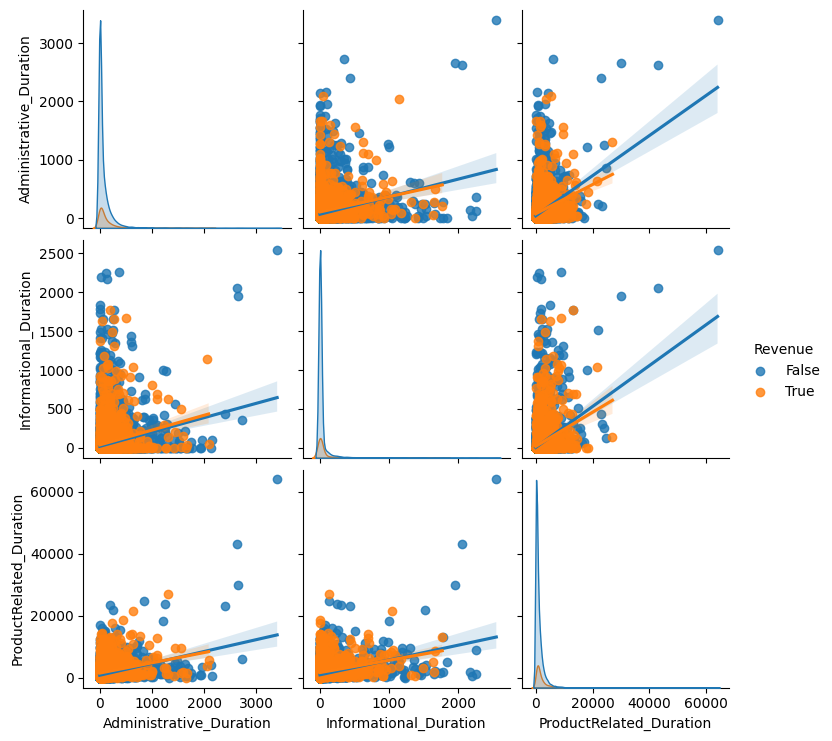

In [17]:
sns.pairplot(data.loc[:,['Administrative_Duration','Informational_Duration','ProductRelated_Duration','Revenue']],hue='Revenue',kind='reg')

Text(0.5, 0, 'Administrative Page Count')

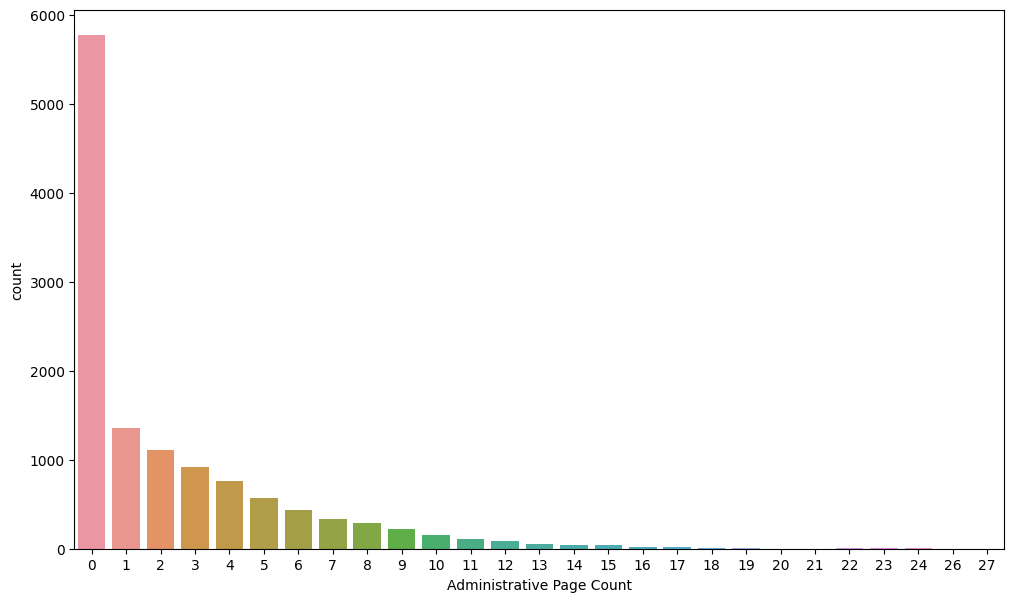

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(x='Administrative',data=data)
plt.xlabel('Administrative Page Count')

(0.0, 1800.0)

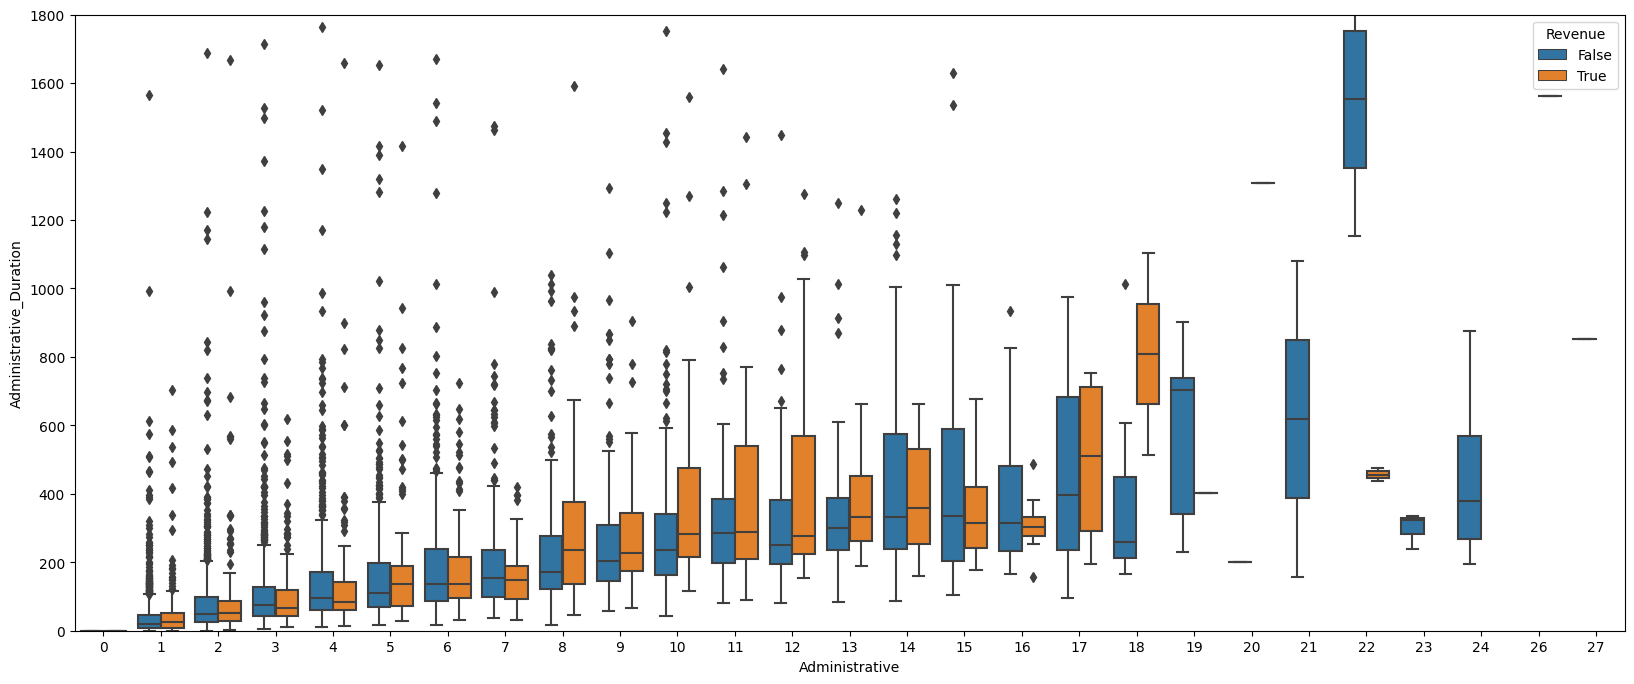

In [20]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Administrative',y='Administrative_Duration',hue='Revenue',data=data)
plt.ylim(0,1800)

When the number of visits to administrative pages exceeds 19, it tends to result in no revenue generation. Conversely, when the visited page count falls below 7, users tend to spend less time on those pages, leading to a lower likelihood of making a deal. However, if the visited page count ranges from 8 to 18, individuals tend to spend more time reading about the administrative page, increasing the chances of making a deal.

Text(0.5, 0, 'Informational-Page-Count')

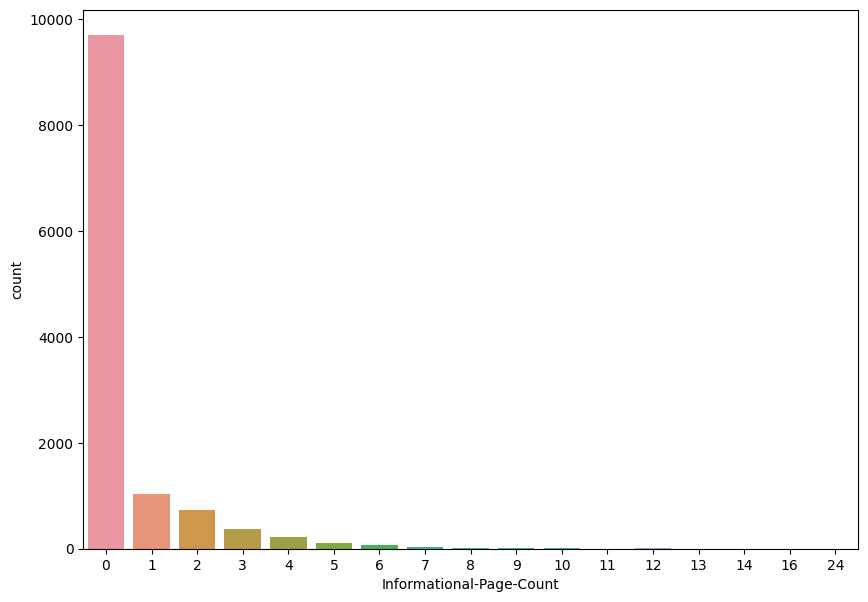

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(x='Informational',data=data)
plt.xlabel('Informational-Page-Count')

It is observed that People do not visit Information Related Pages

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [46]:
def plot_numerical_distribution(data, numerical_features):
    fig, axes = plt.subplots(len(numerical_features), 1, figsize=(10, 15))
    
    for i, feature in enumerate(numerical_features):
        ax = axes[i]
        ax.hist(data[feature], bins=20, alpha=0.5, color='blue')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


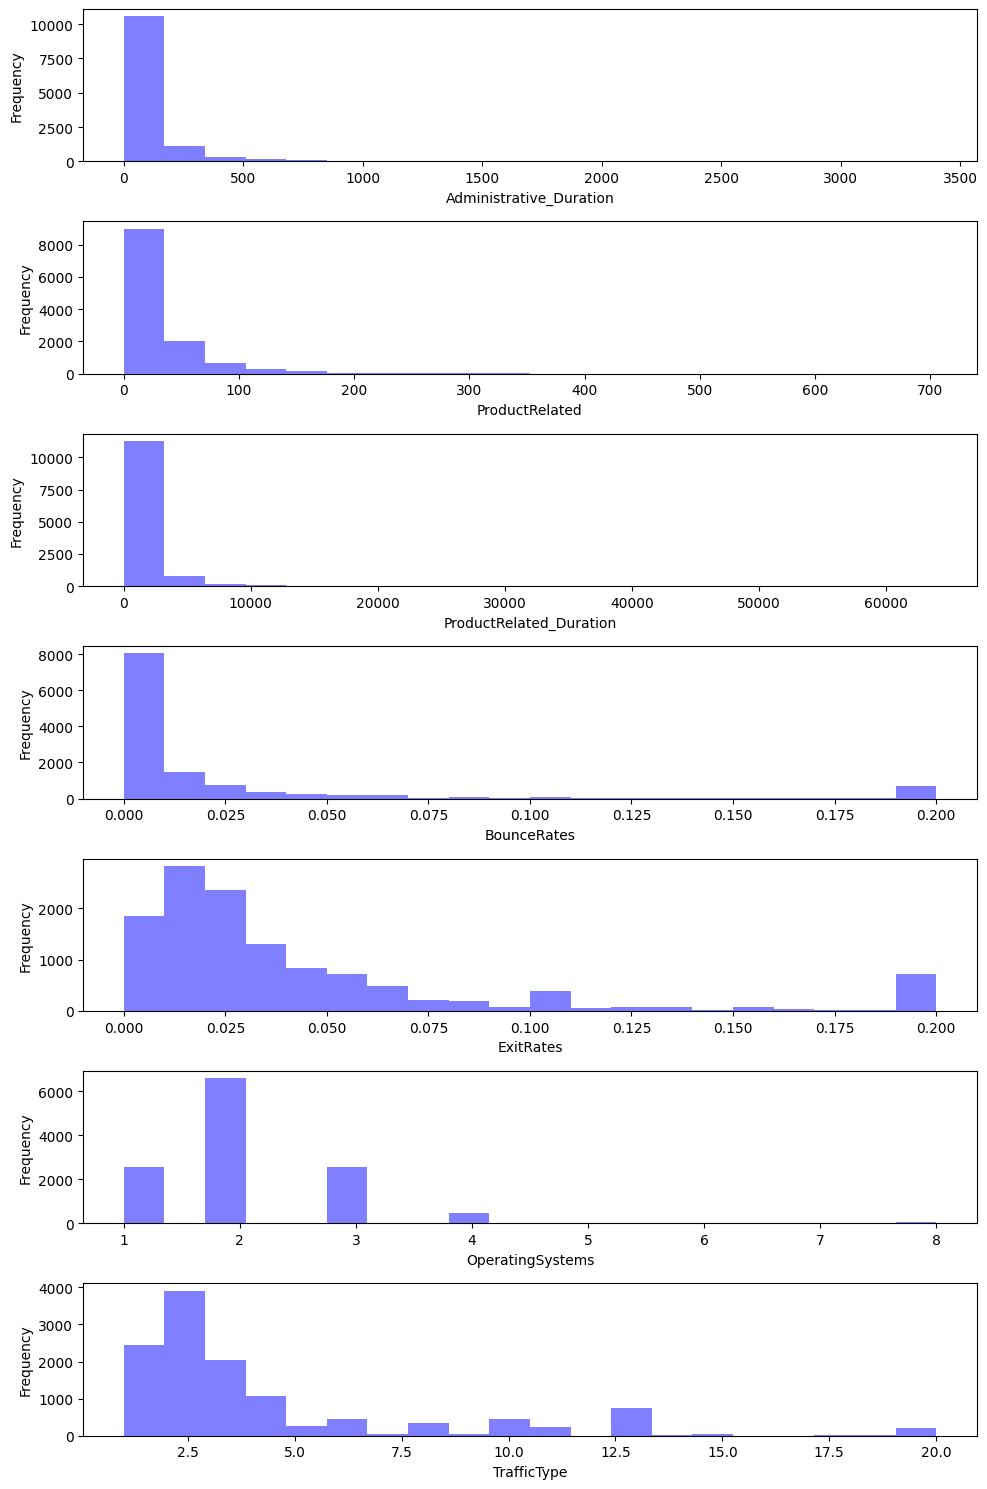

In [47]:
numerical_features = ['Administrative_Duration', 'ProductRelated', 'ProductRelated_Duration',
                      'BounceRates', 'ExitRates', 'OperatingSystems', 'TrafficType']

plot_numerical_distribution(data, numerical_features)

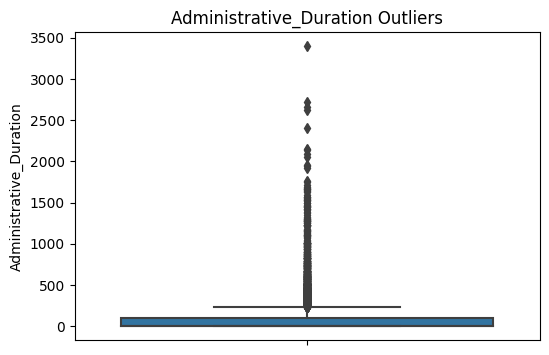

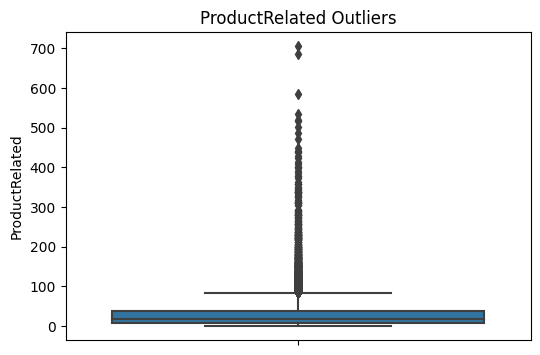

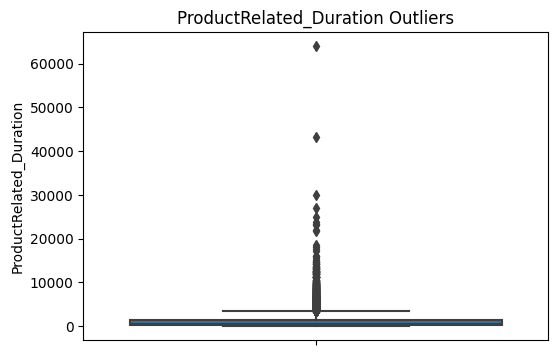

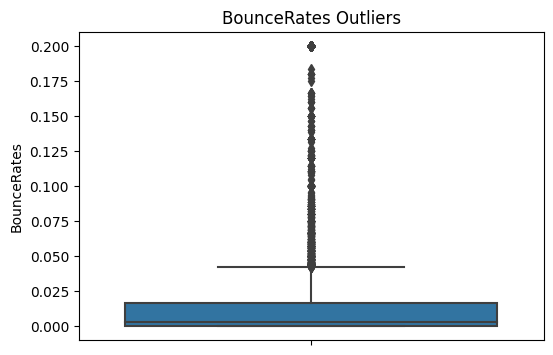

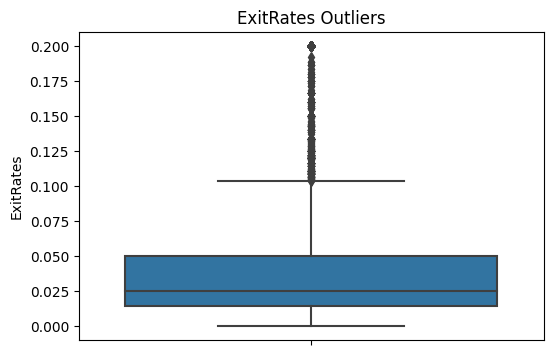

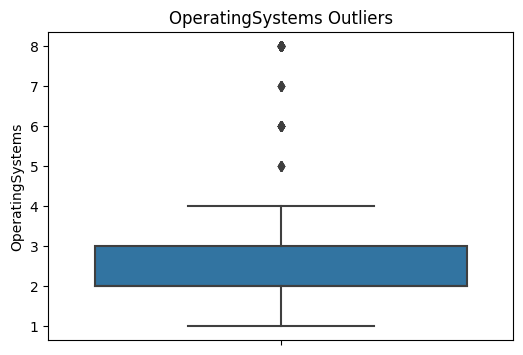

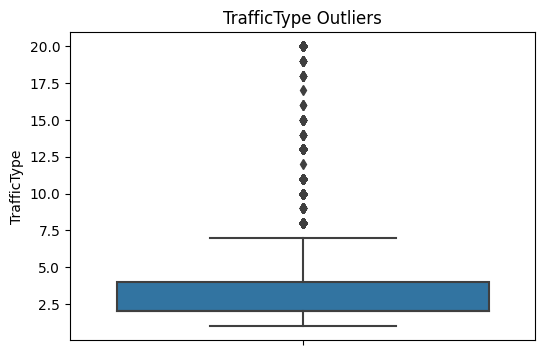

In [29]:
# Outlier Analysis
def outlier_analysis(data):
    # Plot box plots for numerical features to identify outliers
    numerical_features =[ 'Administrative_Duration','ProductRelated', 'ProductRelated_Duration',
                          'BounceRates', 'ExitRates', 'OperatingSystems', 'TrafficType'
                        ]
    for feature in numerical_features:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=data, y=feature)
        plt.title(f'{feature} Outliers')
        plt.show()


# Perform outlier analysis
outlier_analysis(data)

(0.0, 1800.0)

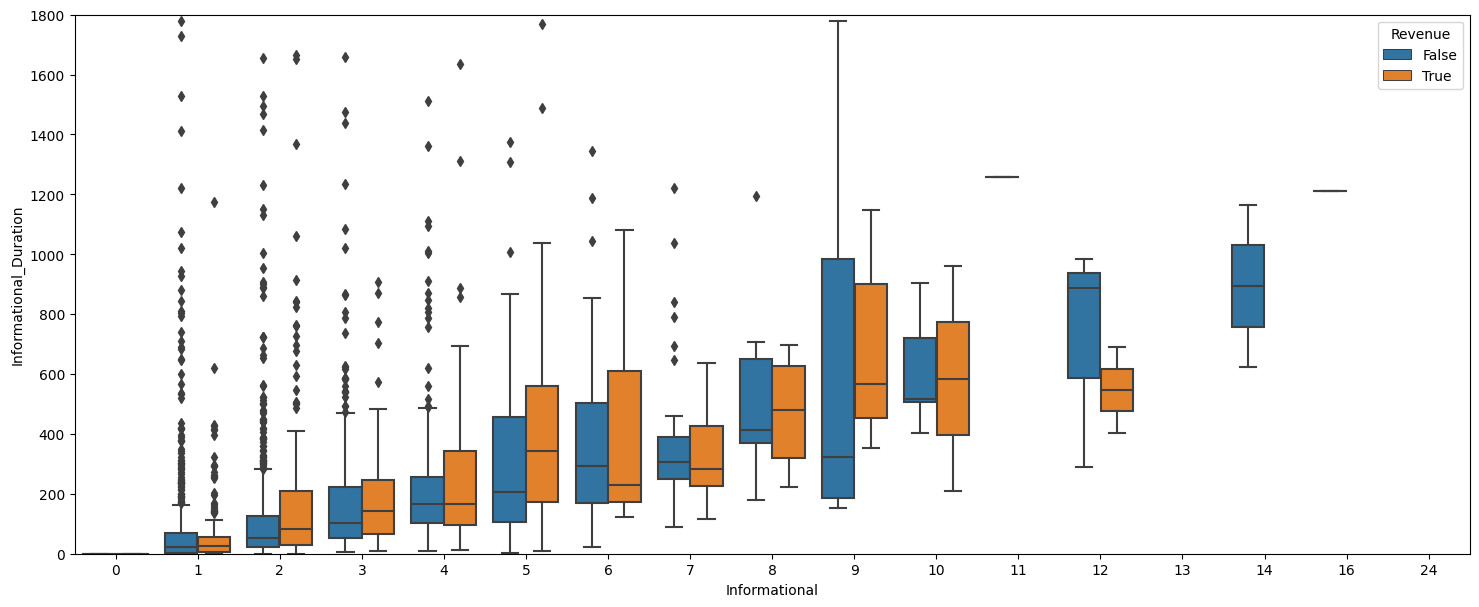

In [30]:
plt.figure(figsize=(18,7))
sns.boxplot(x='Informational',y='Informational_Duration',hue='Revenue',data=data)
plt.ylim(0,1800)

Individuals often dedicate a substantial amount of time to perusing informational content in order to facilitate decision-making processes.

Text(0.5, 0, 'Product related Page Count')

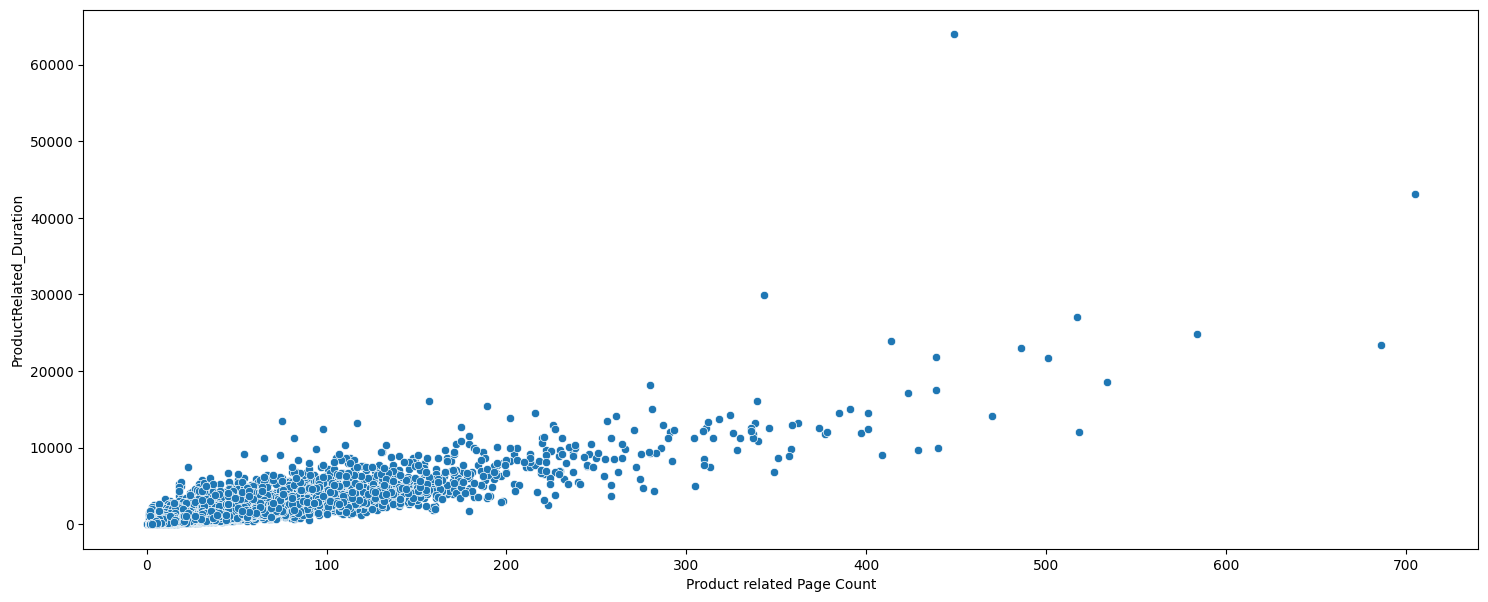

In [31]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='ProductRelated',y='ProductRelated_Duration',data=data)
plt.xlabel('Product related Page Count')

In online environments, there is a higher tendency for individuals to navigate towards pages that are associated with specific products, as opposed to administrative or information-based pages.

<Axes: xlabel='Revenue', ylabel='PageValues'>

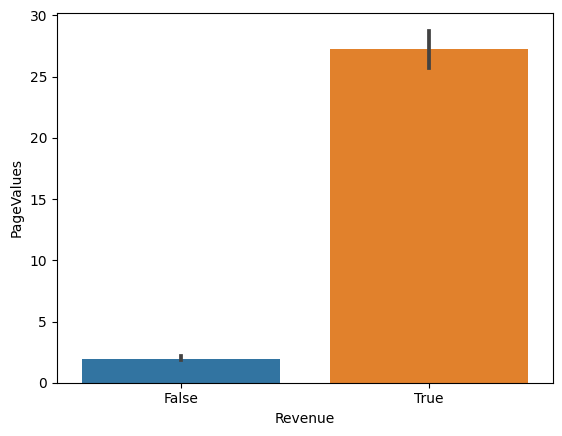

In [32]:
sns.barplot(y='PageValues',x='Revenue', data=data)

In scenarios where the number of pages visited by a user is higher, there is an increased potential for generating revenue.

Text(0, 0.5, 'Mean Time Spent')

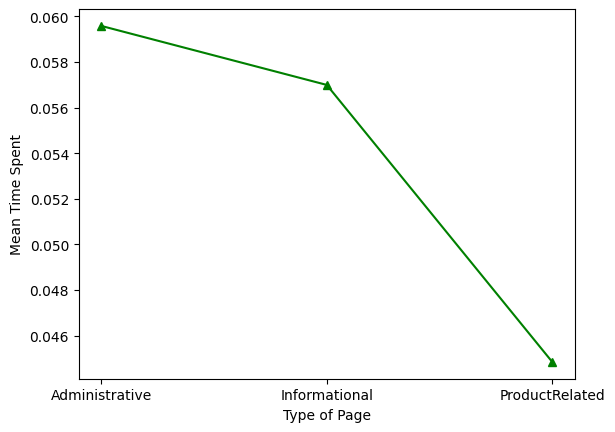

In [33]:
adm=np.mean((data['Administrative']/data['Administrative_Duration']).replace(np.inf,np.nan).dropna())
inm=np.mean((data['Informational']/data['Informational_Duration']).replace(np.inf,np.nan).dropna())
prm=np.mean((data['ProductRelated']/data['ProductRelated_Duration']).replace(np.inf,np.nan).dropna())
pagm=pd.Series([adm,inm,prm],index=['Administrative','Informational','ProductRelated'])
plt.plot(pagm.index,pagm.values,'-^g')
plt.xlabel('Type of Page')
plt.ylabel('Mean Time Spent')

In terms of user engagement, the average time spent on Product Related Pages is relatively shorter compared to Administrative Related Pages. This implies that Product Related Pages should be concise and visually appealing to quickly capture the user's attention, while Administrative Related Pages should provide comprehensive descriptions and information to meet the user's needs. It is important to optimize the content and design of Product Related Pages to make them engaging and easily consumable, considering the tendency of users to skip through them quickly. Conversely, Administrative Related Pages should prioritize detailed explanations and contextual information to provide users with the necessary guidance and understanding. By tailoring the characteristics of each page type to their respective purposes, the overall user experience can be enhanced.

Text(0, 0.5, 'Counting OS where Revenue is generated')

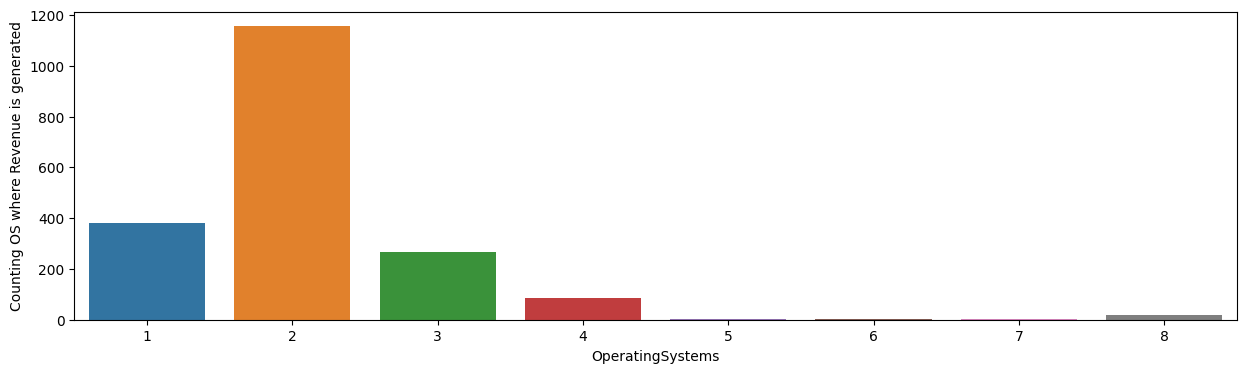

In [34]:
temp=data.groupby('Revenue')['OperatingSystems'].value_counts()
brt=pd.DataFrame(temp[True]) 
plt.figure(figsize=(15,4))
sns.barplot(x=brt.index,y='OperatingSystems',data=brt)
plt.ylabel('Counting OS where Revenue is generated')

Operating System '2' is widely utilized by individuals, and revenue generation is frequently associated with its usage. An effective strategy to garner greater public attention is to display advertisements of products within the download section of Operating System '2'. This approach leverages the visibility and reach of the operating system to maximize exposure and potential customer engagement.

Text(0, 0.5, 'Count the Browser where revenue is generated')

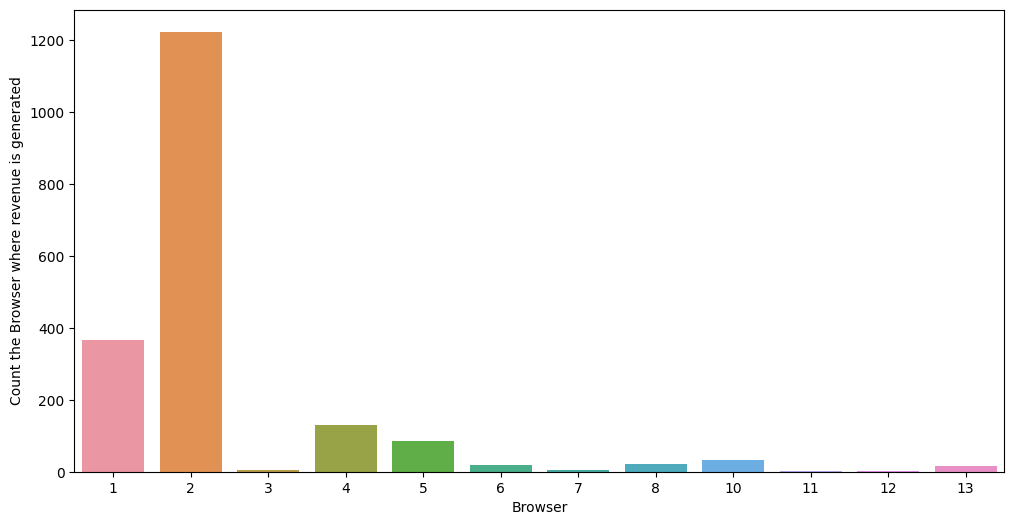

In [35]:
temp=data.groupby('Revenue')['Browser'].value_counts()
tr=pd.DataFrame(temp[True]) 
plt.figure(figsize=(12,6))
sns.barplot(x=tr.index,y='Browser',data=tr)
plt.ylabel('Count the Browser where revenue is generated')

Web browser '2' is commonly utilized by individuals for internet browsing purposes. This browser serves as a revenue-generating platform, as users engage with various online content while utilizing it. Leveraging advertising strategies within Browser '2' can effectively capture public attention, leading to increased visibility and potential business opportunities.

In [50]:
def categorical_bivariate_analysis_plotly(df, categorical_features, target_feature):
    for feature in categorical_features:
        fig = px.histogram(df, x=feature, color=target_feature, barmode='group')
        fig.update_layout(
            title=f'Bivariate Analysis: {feature} vs {target_feature}',
            xaxis_title=feature,
            yaxis_title='Count'
        )
        fig.show()

# List of categorical features for bivariate analysis
categorical_features = ['Administrative', 'ProductRelated', 'Month', 'OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']

# Perform bivariate analysis between categorical features and target feature
categorical_bivariate_analysis_plotly(data, categorical_features, 'Revenue')

### Feature Engineering

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Month']=le.fit_transform(data['Month'])
data['VisitorType']=le.fit_transform(data['VisitorType'])
data['Weekend']=le.fit_transform(data['Weekend'])
data['Revenue']=le.fit_transform(data['Revenue'])

In [52]:
X = data.drop('Revenue',axis=1)
y = data.Revenue
print(X.shape, y.shape)

(12330, 17) (12330,)


In [54]:
y.value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [53]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X=std.fit_transform(X)

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### <b>Modeling

<b> Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
# build a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Logistic Regression Train Score:', lr.score(X_train, y_train))
print('Logistic Regression Test Score:', lr.score(X_test, y_test))


Logistic Regression Train Score: 0.8870351060132082
Logistic Regression Test Score: 0.8805082454717491


In [60]:
# make predictions on the test data
y_pred = lr.predict(X_test)

# evaluate the model using classification report and confusion matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3124
           1       0.75      0.35      0.48       575

    accuracy                           0.88      3699
   macro avg       0.82      0.66      0.70      3699
weighted avg       0.87      0.88      0.86      3699



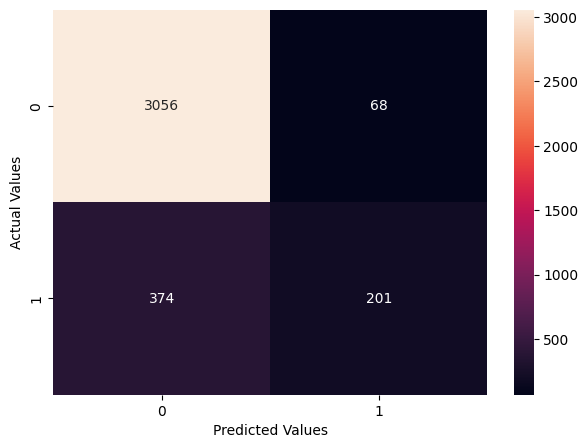

In [61]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [62]:
print("Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.8805082454717491


<b> Decision Tree

In [64]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)
print('Decision Tree Score:', model0.score(X_test, y_test))


Decision Tree Score: 0.8532035685320357


In [65]:
def model_performance_classification_sklearn(model, predictors, target):
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)   
    recall = recall_score(target, pred, average='weighted')  
    precision = precision_score(target, pred, average='weighted')  
    f1 = f1_score(target, pred, average='weighted')  

    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.3%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True-label")
    plt.xlabel("Predicted-label")

In [66]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (8631, 17)
Shape of test set :  (3699, 17)
Percentage of classes in training set:
0    0.845557
1    0.154443
Name: Revenue, dtype: float64
Percentage of classes in test set:
0    0.844553
1    0.155447
Name: Revenue, dtype: float64


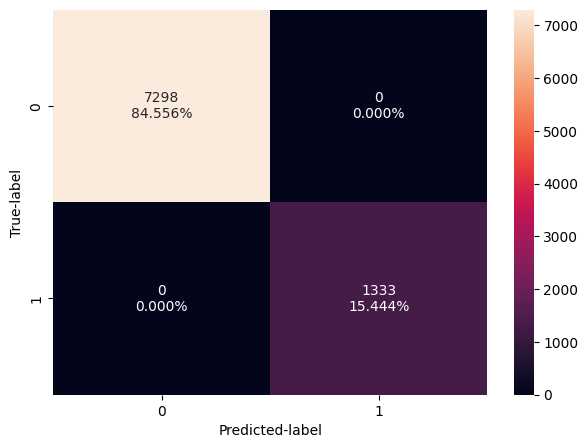

In [67]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [68]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


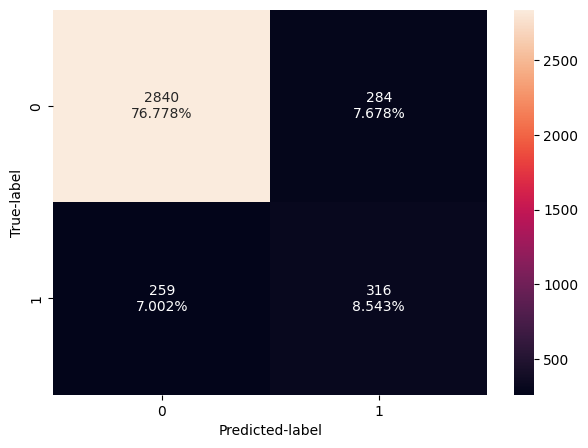

In [69]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [70]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.853204,0.853204,0.855838,0.85447


In [71]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

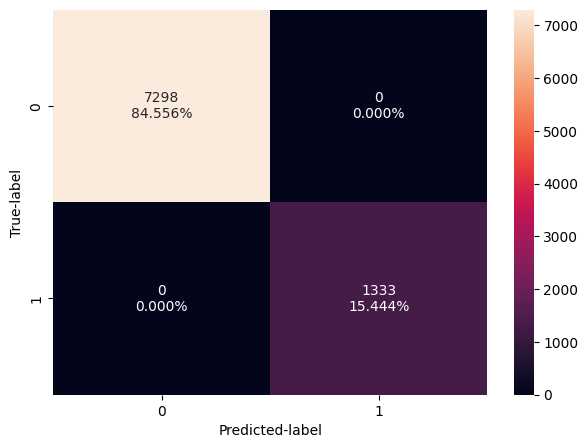

In [72]:
confusion_matrix_sklearn(model, X_train, y_train)

In [73]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


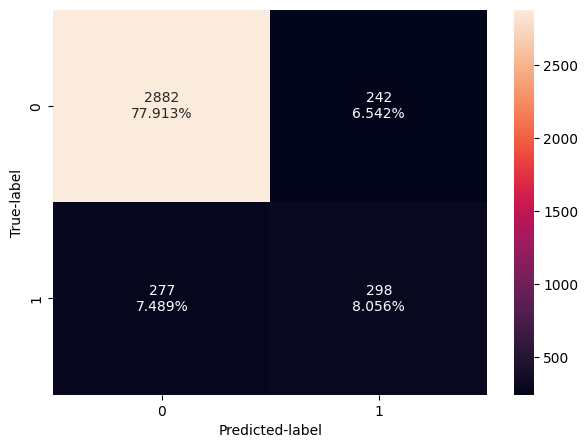

In [74]:
confusion_matrix_sklearn(model, X_test, y_test)

In [75]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.859692,0.859692,0.856281,0.85788


<b> Prepruned Decision Tree

**Using GridSearch method to Hyperparameter tune the tree model**

Hyperparameter tuning poses a challenge as it lacks a straightforward method to quantify the impact of changing hyperparameter values on model loss. Hence, researchers often rely on experimentation to find optimal settings. One common approach is Grid search, which exhaustively explores specific parameter values to determine the best combination.
Grid search is a systematic technique employed to compute the most suitable hyperparameter values. It performs an exhaustive search over a predefined parameter grid to identify the optimal configuration. By utilizing cross-validated grid-search, the parameters of the estimator or model are optimized, ensuring robustness and accuracy during the tuning process.

In [78]:
estimator = DecisionTreeClassifier(random_state=1)
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [20, 60, 100],
    "min_samples_split": [10, 40, 70],
}

acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

estimator = grid_obj.best_estimator_
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=20,
                       min_samples_split=10, random_state=1)

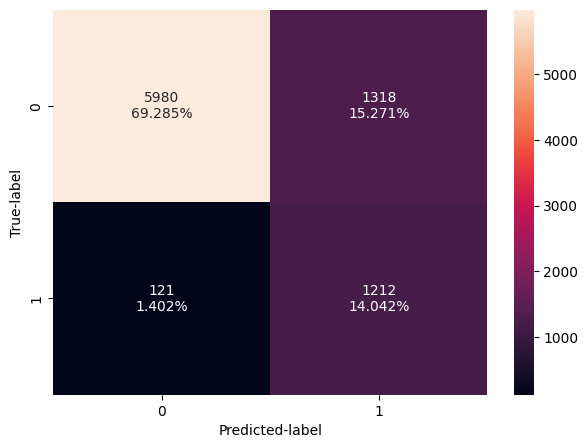

In [79]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [80]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.833275,0.833275,0.902773,0.851659


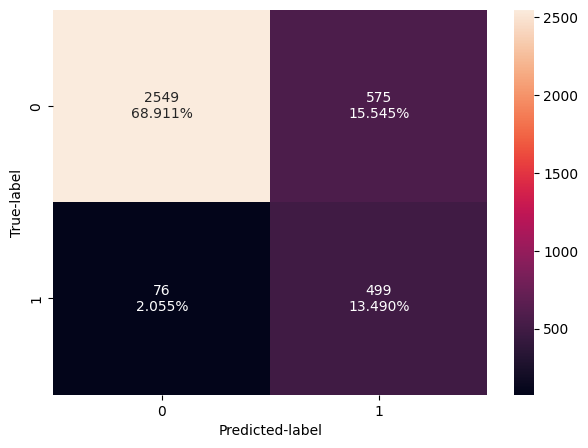

In [81]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [82]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.824006,0.824006,0.892324,0.842997


In [90]:
feature_names = list(data.drop('Revenue',axis=1).columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

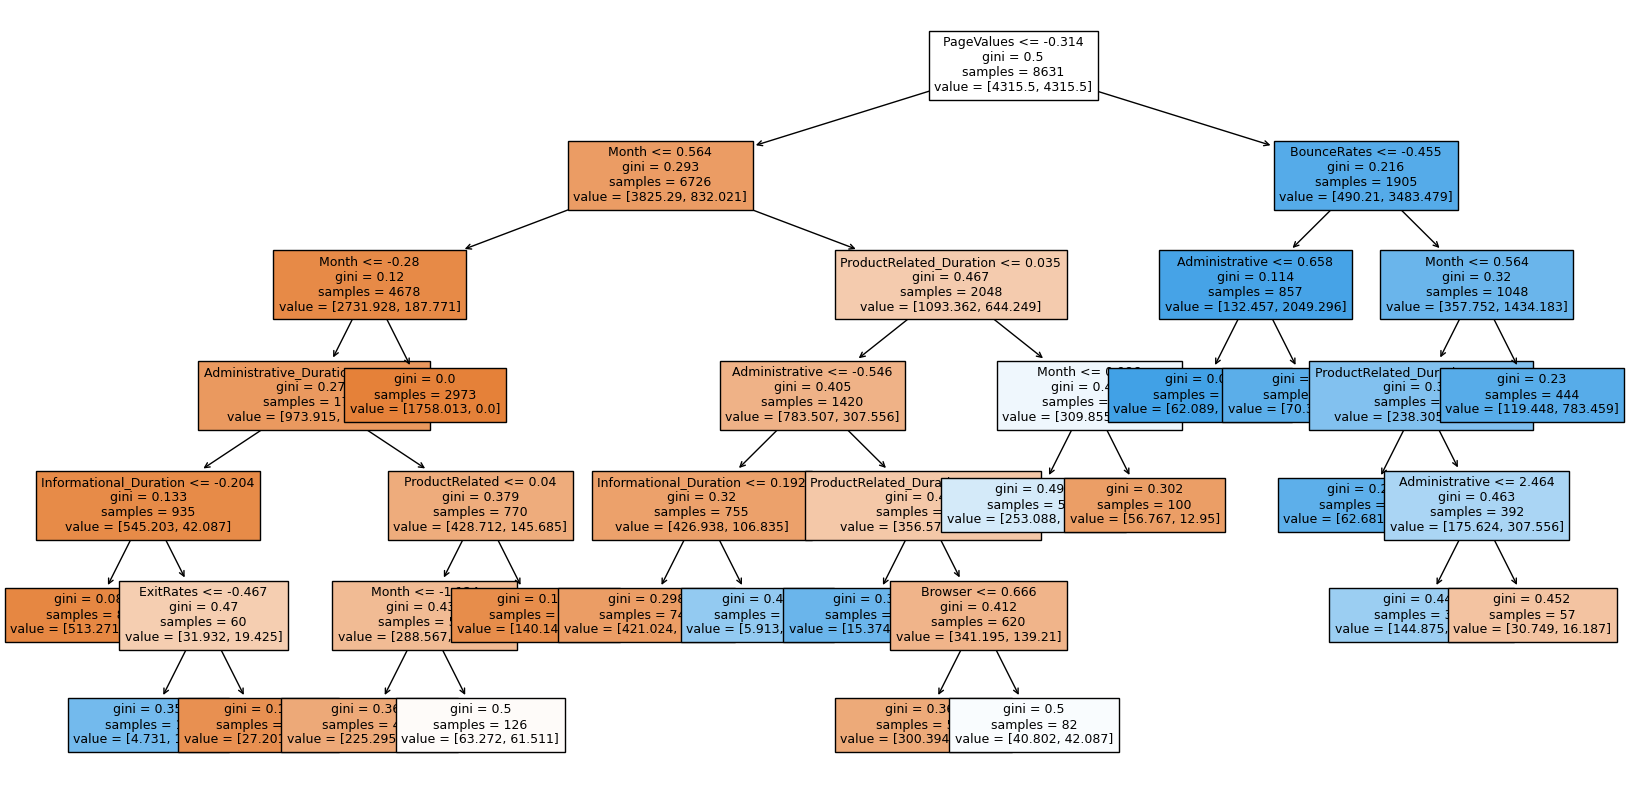

In [91]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [92]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- PageValues <= -0.31
|   |--- Month <= 0.56
|   |   |--- Month <= -0.28
|   |   |   |--- Administrative_Duration <= -0.45
|   |   |   |   |--- Informational_Duration <= -0.20
|   |   |   |   |   |--- weights: [513.27, 22.66] class: 0
|   |   |   |   |--- Informational_Duration >  -0.20
|   |   |   |   |   |--- ExitRates <= -0.47
|   |   |   |   |   |   |--- weights: [4.73, 16.19] class: 1
|   |   |   |   |   |--- ExitRates >  -0.47
|   |   |   |   |   |   |--- weights: [27.20, 3.24] class: 0
|   |   |   |--- Administrative_Duration >  -0.45
|   |   |   |   |--- ProductRelated <= 0.04
|   |   |   |   |   |--- Month <= -1.12
|   |   |   |   |   |   |--- weights: [225.30, 71.22] class: 0
|   |   |   |   |   |--- Month >  -1.12
|   |   |   |   |   |   |--- weights: [63.27, 61.51] class: 0
|   |   |   |   |--- ProductRelated >  0.04
|   |   |   |   |   |--- weights: [140.14, 12.95] class: 0
|   |   |--- Month >  -0.28
|   |   |   |--- weights: [1758.01, 0.00] class: 0
|   |--- Month >  

In [93]:
importances = estimator.feature_importances_
importances

array([0.01211136, 0.00734827, 0.        , 0.00757706, 0.00455821,
       0.03825571, 0.01451352, 0.00422133, 0.7983298 , 0.        ,
       0.1094474 , 0.        , 0.00363733, 0.        , 0.        ,
       0.        , 0.        ])

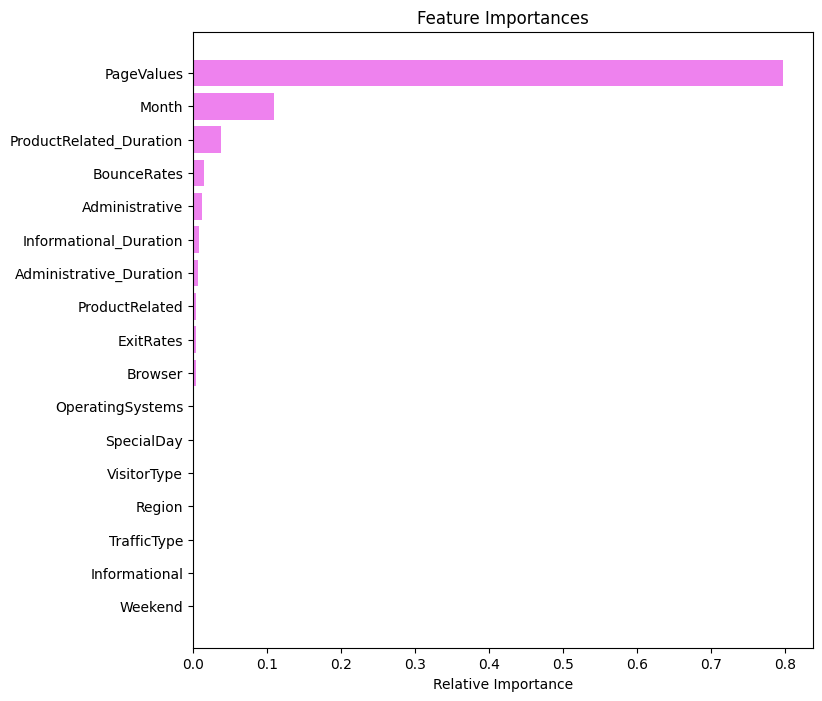

In [94]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [115]:
# training performance comparison of decision trees

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T, decision_tree_perf_train.T, decision_tree_tune_perf_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
  "Decision Tree without class weight","Decision Tree with class weight", "Decision Tree (Pre-Pruned)"
]
print("Train-set performance comparison:")
models_train_comp_df

Train-set performance comparison:


,Decision Tree without class weight,Decision Tree with class weight,Decision Tree (Pre-Pruned)
Accuracy,1.0,1.0,0.833275
Recall,1.0,1.0,0.833275
Precision,1.0,1.0,0.902773
F1,1.0,1.0,0.851659


In [116]:
# testing performance comparison of decision trees

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T, decision_tree_perf_test.T, decision_tree_tune_perf_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class weight","Decision Tree with class weight", "Decision Tree (Pre-Pruned)"
]
print("Test-set performance comparison:")
models_test_comp_df

Test-set performance comparison:


,Decision Tree without class weight,Decision Tree with class weight,Decision Tree (Pre-Pruned)
Accuracy,0.853204,0.859692,0.824006
Recall,0.853204,0.859692,0.824006
Precision,0.855838,0.856281,0.892324
F1,0.854470,0.857880,0.842997


- From the training and test performance, we can observe that Pre-pruned decision trees perform better than other decision trees.

#### Models with the Org. Data

In [117]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Train-set Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train), average = "weighted")
    print("{}: {}".format(name, scores))

print("\n" "Test-set Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_test, model.predict(X_test), average = "weighted")
    print("{}: {}".format(name, scores_val))


Train-set Performance:

Logistic regression: 0.8870351060132082
Bagging: 0.9903835013324065
Random forest: 1.0
GBM: 0.9214459506430309
Adaboost: 0.8987371104159425
dtree: 1.0

Test-set Performance:

Logistic regression: 0.8805082454717491
Bagging: 0.8861854555285212
Random forest: 0.8969991889699919
GBM: 0.8972695323060287
Adaboost: 0.889970262233036
dtree: 0.8532035685320357


- Logistic Regression: Logistic regression is a linear model that utilizes a logistic function to estimate the probability of a outcome. It is commonly employed for binary classification tasks.
- Bagging: Bagging is an ensemble technique that combines multiple models, often decision trees, to generate predictions. It accomplishes this by training each model on a random subset of the training data and averaging their predictions.
- Random Forest: Random forest is another ensemble technique that employs decision trees. However, each tree is trained on a random subset of features and training data instances. This strategy helps to mitigate overfitting and enhance the model's generalization ability.
- Gradient Boosting Machine (GBM): GBM is a boosting algorithm that combines weak learners, typically decision trees, to form a strong learner. It achieves this by iteratively training new trees to rectify the errors made by the previous trees, with a particular emphasis on challenging instances.
- Adaboost: Adaboost is another boosting algorithm that combines weak learners to create a robust learner. It operates by assigning higher weights to misclassified instances and subsequently training new weak learners to focus on these instances.
- Decision Tree: A decision tree is a straightforward non-parametric model that employs a tree structure to make predictions. Each internal node in the tree represents a decision based on a feature, while each leaf node corresponds to a class label.

<b> Models with oversampled data

In [118]:
print("Before Oversampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before Oversampling, counts of label '1': {} \n".format(sum(y_train == 1)))
sm = SMOTE(sampling_strategy="auto", k_neighbors=5, random_state=1)  
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("Before Oversampling, counts of label '0': {}".format(sum(y_train_over == 0)))
print("Before Oversampling, counts of label '1': {} \n".format(sum(y_train_over == 1)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label '0': 7298
Before Oversampling, counts of label '1': 1333 

Before Oversampling, counts of label '0': 7298
Before Oversampling, counts of label '1': 7298 

After Oversampling, the shape of train_X: (14596, 17)
After Oversampling, the shape of train_y: (14596,) 



- **SMOTE** stands for Synthetic Minority Over Sampling Technique, which is a data augmentation method commonly used in imbalanced classification problems. It generates new synthetic samples of the minority class by interpolating between existing minority samples. This helps to balance the class distribution and improve the performance of the classifier.

- The code you above uses the SMOTE class from the imblearn library to oversample the minority class in the training data. The sampling_strategy parameter is set to "auto", which means that SMOTE will automatically determine the appropriate sampling ratio to balance the class distribution. The k_neighbors parameter is set to 5, which specifies the number of nearest neighbors to use for generating synthetic samples. Finally, the random_state parameter is set to 1 for reproducibility.

- The fit_resample() method of the SMOTE class is then called on X_train and y_train to generate new synthetic samples of the minority class. The resulting oversampled data is then assigned to new variables X_train_over and y_train_over. These new variables can be used to train a classifier that is less biased towards the majority class, and hopefully improves the overall classification performance.

<b> Training all models on the oversampled data

In [119]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Train-set Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over), average = "weighted")
    print("{}: {}".format(name, scores))

print("\n" "Test-set Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_test, model.predict(X_test), average = "weighted")
    print("{}: {}".format(name, scores))


Train-set Performance:

Logistic regression: 0.8368046040010962
Bagging: 0.996163332419841
Random forest: 1.0
GBM: 0.934297067689778
Adaboost: 0.9108659906823787
dtree: 1.0

Test-set Performance:

Logistic regression: 0.8718572587185726
Bagging: 0.8872668288726683
Random forest: 0.8891592322249257
GBM: 0.8886185455528521
Adaboost: 0.881859962151933
dtree: 0.8615842119491754


### Models with undersampling of data

In [120]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

- RandomUnderSampler is a technique used for handling imbalanced datasets in machine learning. It is used to randomly remove examples from the majority class in order to balance the dataset. This helps to prevent the model from being biased towards the majority class and can improve the performance of the model.

- In the code above, the RandomUnderSampler is initialized with a random_state of 1, which ensures that the sampling is reproducible. Then, the fit_resample method is called with the training data X_train and y_train as input. This method returns a new set of training data X_train_un and labels y_train_un, where the majority class has been undersampled to balance the classes. The new dataset can then be used to train a machine learning model that is less prone to bias towards the majority class.

In [121]:
print("Before Under Sampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before Under Sampling, counts of label '1': {} \n".format(sum(y_train == 1)))

print("After Under Sampling, counts of label '0': {}".format(sum(y_train_un == 0)))
print("After Under Sampling, counts of label '1': {} \n".format(sum(y_train_un == 1)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label '0': 7298
Before Under Sampling, counts of label '1': 1333 

After Under Sampling, counts of label '0': 1333
After Under Sampling, counts of label '1': 1333 

After Under Sampling, the shape of train_X: (2666, 17)
After Under Sampling, the shape of train_y: (2666,) 



<b> MOdels with undersampled data

In [122]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))


print("\n" "Train-set Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un), average = "weighted")
    print("{}: {}".format(name, scores))

print("\n" "Test-set Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_test, model.predict(X_test), average = "weighted")
    print("{}: {}".format(name, scores))


Train-set Performance:

Logistic regression: 0.8199549887471868
Bagging: 0.9898724681170292
Random forest: 1.0
GBM: 0.8863465866466617
Adaboost: 0.8552138034508627
dtree: 1.0

Test-set Performance:

Logistic regression: 0.8699648553663152
Bagging: 0.8453636117869695
Random forest: 0.8550959718842931
GBM: 0.8569883752365505
Adaboost: 0.858610435252771
dtree: 0.7967018113003514


- Looking at the training performance, it appears that GBM has performed well over other

- For the validation performance, we can also observe that all the models are doing good with good performanc but GBM did the best

- Overall, the Adaboost and GBM classifiers appear to be the good performing models on the dataset based on their recall scores on the validation set so these models will be tuned using hyperparameter tuning

### Tuning Adaboost and Gradient Boosting

<b> Tuning with undersampling of data

In [123]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 30, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8604967474866942:


In [124]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=50,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb1.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [125]:
# Checking model's performance on training set
adb1_train = model_performance_classification_sklearn(
    tuned_adb1, X_train_un, y_train_un
)
adb1_train

,Accuracy,Recall,Precision,F1
0,0.845461,0.845461,0.847496,0.845235


In [126]:
# Checking model's performance on validation set
adb1_val = model_performance_classification_sklearn(tuned_adb1, X_test, y_test)
adb1_val

,Accuracy,Recall,Precision,F1
0,0.871587,0.871587,0.898514,0.88035


<b> Tuning with Original data

In [127]:

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'learning_rate': 0.01, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.7516684970854101:


In [128]:
tuned_adb2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=50,
    learning_rate=0.01,
    base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=1),
                   learning_rate=0.01, random_state=1)

In [129]:
# Checking model's performance on training set
adb2_train = model_performance_classification_sklearn(tuned_adb2, X_train, y_train)
adb2_train

,Accuracy,Recall,Precision,F1
0,0.883791,0.883791,0.898232,0.889119


In [130]:
# Checking model's performance on validation set
adb2_val = model_performance_classification_sklearn(tuned_adb2, X_test, y_test)
adb2_val

,Accuracy,Recall,Precision,F1
0,0.878886,0.878886,0.894235,0.884569


### Tuning Gradient Boosting classifier

<B> Tuning with undersampled data

In [131]:
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 1, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8514770071245529:


In [132]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.5)

In [133]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.889347,0.889347,0.889558,0.889332


In [134]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.856448,0.856448,0.899948,0.869195


<b> Tuning with Original Data

In [135]:
#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.6032018247866858:


In [136]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.5)

In [137]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train, y_train)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.867455,0.867455,0.908294,0.87908


In [138]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.856448,0.856448,0.899948,0.869195


<b> Predicting with the best model on test data

In [139]:
# Checking model's performance on validation set
gbm_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm_test

,Accuracy,Recall,Precision,F1
0,0.856448,0.856448,0.899948,0.869195


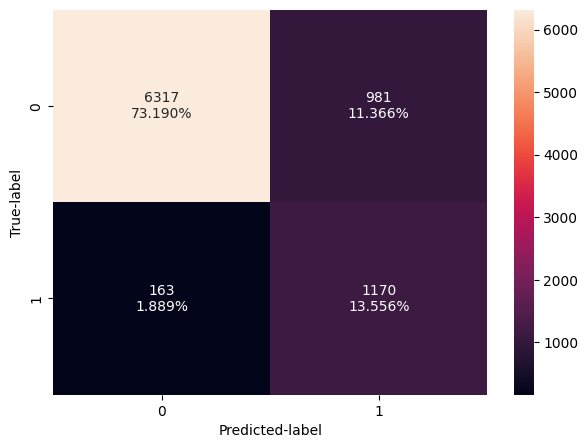

In [140]:
confusion_matrix_sklearn(tuned_gbm1, X_train, y_train)

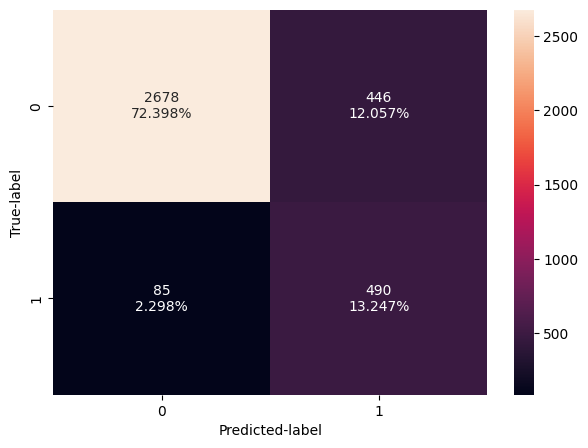

In [141]:
confusion_matrix_sklearn(tuned_gbm1, X_test, y_test)

### Model Performances comparison

In [142]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb1_train.T,
        adb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data
Accuracy,0.889347,0.867455,0.845461,0.883791
Recall,0.889347,0.867455,0.845461,0.883791
Precision,0.889558,0.908294,0.847496,0.898232
F1,0.889332,0.879080,0.845235,0.889119


In [143]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [gbm1_val.T, gbm2_val.T, adb1_val.T, adb2_val.T], axis=1,
)
models_train_comp_df.columns = [

    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data
Accuracy,0.856448,0.856448,0.871587,0.878886
Recall,0.856448,0.856448,0.871587,0.878886
Precision,0.899948,0.899948,0.898514,0.894235
F1,0.869195,0.869195,0.880350,0.884569


<b>Training Performance Comparison:</b>

Upon analyzing the training performance comparison, it is evident that the models trained using gradient boosting with undersampled and original data, as well as AdaBoost with undersampled and original data, demonstrate varying levels of accuracy, recall, precision, and F1 scores. The gradient boosting model trained with undersampled data achieved the highest accuracy, recall, and F1 scores, indicating its effectiveness in correctly classifying instances and capturing the true positive rate. The gradient boosting model trained with original data also performed well, but slightly lower than the undersampled version, while still outperforming the AdaBoost models. The AdaBoost models trained with undersampled and original data exhibited lower accuracy, recall, precision, and F1 scores compared to the gradient boosting models. However, it is worth noting that the precision score of the AdaBoost model trained with original data was relatively higher than the other models. These observations highlight the impact of training data manipulation techniques and algorithm selection on the performance of the models.

<b>Testing Performance Comparison:</b>


In the testing phase, various models were evaluated and compared based on their performance metrics. Two gradient boosting models, one trained with undersampled data and the other with original data, along with two AdaBoost models trained with undersampled and original data, were assessed.

The accuracy metric measures the overall correctness of the model's predictions. Both gradient boosting models and AdaBoost models trained with undersampled and original data achieved similar accuracy scores, ranging from 0.856448 to 0.878886. This indicates that the models were able to make correct predictions with a relatively high level of accuracy.

The recall metric focuses on the model's ability to identify positive instances correctly. Similar to the accuracy scores, the gradient boosting models and AdaBoost models trained with undersampled and original data achieved consistent recall scores of 0.856448 to 0.878886. This indicates that the models were effective in correctly identifying positive instances.

Precision, on the other hand, assesses the model's ability to avoid false positives. The gradient boosting models and AdaBoost models trained with undersampled and original data exhibited comparable precision scores, ranging from 0.894235 to 0.899948. These scores indicate that the models had a relatively low rate of false positive predictions.

The F1 score, which considers both precision and recall, provides an overall assessment of the model's performance. The gradient boosting models and AdaBoost models trained with undersampled and original data achieved consistent F1 scores of 0.869195 to 0.884569. These scores indicate a balance between precision and recall, suggesting that the models performed well in terms of both avoiding false positives and correctly identifying positive instances.

In summary, the evaluation of the models based on accuracy, recall, precision, and F1 scores demonstrated consistent performance across the gradient boosting and AdaBoost models trained with undersampled and original data. These findings suggest that both undersampling and original data can yield effective models, with comparable performance in terms of accuracy, recall, precision, and F1 scores.

### All Observations

#### Data Loading and Preparation

Data is loaded using csv file. The dataset consists of 12,330 instances, each containing various features such as Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay, OperatingSystems, Browser, Region, and TrafficType.

The mean values for the features are as follows: Administrative (2.315166), Administrative_Duration (80.818611), Informational (0.503569), Informational_Duration (34.472398), ProductRelated (31.731468), ProductRelated_Duration (1194.746220), BounceRates (0.022191), ExitRates (0.043073), PageValues (5.889258), SpecialDay (0.061427), OperatingSystems (2.124006), Browser (2.357097), Region (3.147364), and TrafficType (4.069586).

The standard deviations for the features are: Administrative (3.321784), Administrative_Duration (176.779107), Informational (1.270156), Informational_Duration (140.749294), ProductRelated (44.475503), ProductRelated_Duration (1913.669288), BounceRates (0.048488), ExitRates (0.048597), PageValues (18.568437), SpecialDay (0.198917), OperatingSystems (0.911325), Browser (1.717277), Region (2.401591), and TrafficType (4.025169).

The minimum values observed in the dataset are: Administrative (0), Administrative_Duration (0), Informational (0), Informational_Duration (0), ProductRelated (0), ProductRelated_Duration (0), BounceRates (0), ExitRates (0), PageValues (0), SpecialDay (0), OperatingSystems (1), Browser (1), Region (1), and TrafficType (1).

The 25th percentile values indicate that 25% of the instances have values equal to or below the following: Administrative (0), Administrative_Duration (0), Informational (0), Informational_Duration (0), ProductRelated (7), ProductRelated_Duration (184.137500), BounceRates (0), ExitRates (0.014286), PageValues (0), SpecialDay (0), OperatingSystems (2), Browser (2), Region (1), and TrafficType (2).

The median (50th percentile) values for the features are: Administrative (1), Administrative_Duration (7.5), Informational (0), Informational_Duration (0), ProductRelated (18), ProductRelated_Duration (598.936905), BounceRates (0.003112), ExitRates (0.025156), PageValues (0), SpecialDay (0), OperatingSystems (2), Browser (2), Region (3), and TrafficType (2).

The 75th percentile values indicate that 75% of the instances have values equal to or below the following: Administrative (4), Administrative_Duration (93.256250), Informational (0), Informational_Duration (0), ProductRelated (38), ProductRelated_Duration (1464.157214), BounceRates (0.016813), ExitRates (0.050000), PageValues (0), SpecialDay (0), OperatingSystems (3), Browser (2), Region (4), and TrafficType (4).

The maximum values observed in the dataset are: Administrative (27), Administrative_Duration (3398.750000), Informational (24), Informational_Duration (2549.375000).

There are also no null values present in the data. The variables "Administrative" and "Administrative_Duration" exhibit a moderate positive correlation of 0.601583. This suggests that as the number of administrative pages visited by the user increases, the corresponding duration of their visit also tends to increase. The variables "BounceRates" and "ExitRates" show a strong positive correlation of 0.913004. This indicates that if the bounce rate (the percentage of visitors who leave the website after viewing a single page) is high, the exit rate (the percentage of visitors who exit the website from a specific page) is also likely to be high.

Additionally, the variable "PageValues" exhibits a positive correlation of 0.492569 with the "Revenue" variable. This implies that as the page value (the average value of the page visited by the user) increases, there is a higher chance of generating revenue.

Furthermore, the variable "SpecialDay" shows a weak negative correlation of -0.082305 with the "Revenue" variable. This suggests that if the user visits the website on a special day (e.g., holiday or weekend), there is a slightly lower likelihood of generating revenue.





#### EDA

After analyzing the revenue countplot, it is evident that the dataset exhibits imbalanced data. Specifically, it is observed that only 18% of the administrative deals are successful. Moreover, a significant majority of administrative counts fall into the categories of 0 and 1. Moving on to the boxplot analysis of administrative and administrative duration variables, interesting patterns emerge. When the number of visits to administrative pages surpasses 19, there is a clear indication of no revenue generation. Conversely, if the visited page count drops below 7, users tend to spend less time on those pages, resulting in a decreased likelihood of deal conversion. However, when the visited page count ranges from 8 to 18, individuals tend to allocate more time to engage with the administrative content, thereby increasing the chances of successful deals.

Shifting focus to the count plot of informational pages, it becomes evident that users do not frequently visit pages related to information. Furthermore, upon examining the distributions of numerical variables, slight right-skewness is observed in some features. The outlier plots reveal the presence of outliers in traffic type, bounce rates, and exit rates. Additionally, by analyzing the boxplot of information and informational duration, segregated based on revenue, it is evident that individuals often invest a considerable amount of time exploring informational content to facilitate their decision-making processes.

Examining the scatter plot of product-related pages and product-related duration, it becomes apparent that users demonstrate a stronger inclination towards pages associated with specific products in online environments, as opposed to administrative or information-based pages.

Lastly, the barplot depicting the relationship between the number of pages visited and revenue reveals that as the number of pages visited by a user increases, the potential for revenue generation also tends to increase.

Considering user engagement, it is notable that the average time spent on product-related pages is relatively shorter compared to administrative-related pages. This suggests that product-related pages should be concise and visually captivating to swiftly capture the user's attention. On the other hand, administrative-related pages should prioritize comprehensive descriptions and information to fulfill the user's needs. Optimizing the content and design of product-related pages to make them engaging and easily consumable is crucial, taking into account the tendency of users to swiftly navigate through them. Conversely, administrative-related pages should emphasize detailed explanations and contextual information to provide users with the necessary guidance and understanding. By tailoring the characteristics of each page type to their respective purposes, the overall user experience can be enhanced.

Operating System '2' is widely utilized by individuals, and revenue generation is frequently associated with its usage. An effective strategy to garner greater public attention is to display advertisements of products within the download section of Operating System '2'. This approach leverages the visibility and reach of the operating system to maximize exposure and potential customer engagement. Web browser '2' is commonly utilized by individuals for internet browsing purposes. This browser serves as a revenue-generating platform, as users engage with various online content while utilizing it. Leveraging advertising strategies within Browser '2' can effectively capture public attention, leading to increased visibility and potential business opportunities.







#### Feature Engineering

The categorical features like Month, visitortype, weekend, and revenue are encoded using the label encoder, As there are several classes in each category so using one hot encoder would increase the dimenionality and it might cause a issue so we used only label encoding and all the values are scaled using standard scaler before using any modeling

#### Modeling 

This project used several models in this project and they can be seen as shown below
- Logistic Regression: Logistic regression is a linear model that utilizes a logistic function to estimate the probability of a outcome. It is commonly employed for binary classification tasks.
- Bagging: Bagging is an ensemble technique that combines multiple models, often decision trees, to generate predictions. It accomplishes this by training each model on a random subset of the training data and averaging their predictions.
- Random Forest: Random forest is another ensemble technique that employs decision trees. However, each tree is trained on a random subset of features and training data instances. This strategy helps to mitigate overfitting and enhance the model's generalization ability.
- Gradient Boosting Machine (GBM): GBM is a boosting algorithm that combines weak learners, typically decision trees, to form a strong learner. It achieves this by iteratively training new trees to rectify the errors made by the previous trees, with a particular emphasis on challenging instances.
- Adaboost: Adaboost is another boosting algorithm that combines weak learners to create a robust learner. It operates by assigning higher weights to misclassified instances and subsequently training new weak learners to focus on these instances.
- Decision Tree: A decision tree is a straightforward non-parametric model that employs a tree structure to make predictions. Each internal node in the tree represents a decision based on a feature, while each leaf node corresponds to a class label.

As the data is imbalanced so the models are trained using original, oversampled and undersampled data and also evaluated on the test data, SMOTE is used for oversampling and randomundersampler is used for undrsampling. SMOTE stands for Synthetic Minority Over Sampling Technique, which is a data augmentation method commonly used in imbalanced classification problems. It generates new synthetic samples of the minority class by interpolating between existing minority samples. This helps to balance the class distribution and improve the performance of the classifier. RandomUnderSampler is a technique used for handling imbalanced datasets in machine learning. It is used to randomly remove examples from the majority class in order to balance the dataset. This helps to prevent the model from being biased towards the majority class and can improve the performance of the model.
Upon analyzing the training performance, it is evident that the Gradient Boosting Machine (GBM) outperformed the other models. As for the validation performance, all the models displayed commendable results, but GBM exhibited the highest level of performance. Consequently, based on the recall scores observed on the validation set, both the Adaboost and GBM classifiers can be identified as the top-performing models for this dataset. Consequently, further enhancement of these models will be pursued through hyperparameter tuning.


#### Model Evaluation

<b>Training Performance Comparison:</b>

Upon analyzing the training performance comparison, it is evident that the models trained using gradient boosting with undersampled and original data, as well as AdaBoost with undersampled and original data, demonstrate varying levels of accuracy, recall, precision, and F1 scores. The gradient boosting model trained with undersampled data achieved the highest accuracy, recall, and F1 scores, indicating its effectiveness in correctly classifying instances and capturing the true positive rate. The gradient boosting model trained with original data also performed well, but slightly lower than the undersampled version, while still outperforming the AdaBoost models. The AdaBoost models trained with undersampled and original data exhibited lower accuracy, recall, precision, and F1 scores compared to the gradient boosting models. However, it is worth noting that the precision score of the AdaBoost model trained with original data was relatively higher than the other models. These observations highlight the impact of training data manipulation techniques and algorithm selection on the performance of the models.

<b>Testing Performance Comparison:</b>


In the testing phase, various models were evaluated and compared based on their performance metrics. Two gradient boosting models, one trained with undersampled data and the other with original data, along with two AdaBoost models trained with undersampled and original data, were assessed.

The accuracy metric measures the overall correctness of the model's predictions. Both gradient boosting models and AdaBoost models trained with undersampled and original data achieved similar accuracy scores, ranging from 0.856448 to 0.878886. This indicates that the models were able to make correct predictions with a relatively high level of accuracy.

The recall metric focuses on the model's ability to identify positive instances correctly. Similar to the accuracy scores, the gradient boosting models and AdaBoost models trained with undersampled and original data achieved consistent recall scores of 0.856448 to 0.878886. This indicates that the models were effective in correctly identifying positive instances.

Precision, on the other hand, assesses the model's ability to avoid false positives. The gradient boosting models and AdaBoost models trained with undersampled and original data exhibited comparable precision scores, ranging from 0.894235 to 0.899948. These scores indicate that the models had a relatively low rate of false positive predictions.

The F1 score, which considers both precision and recall, provides an overall assessment of the model's performance. The gradient boosting models and AdaBoost models trained with undersampled and original data achieved consistent F1 scores of 0.869195 to 0.884569. These scores indicate a balance between precision and recall, suggesting that the models performed well in terms of both avoiding false positives and correctly identifying positive instances.

In summary, the evaluation of the models based on accuracy, recall, precision, and F1 scores demonstrated consistent performance across the gradient boosting and AdaBoost models trained with undersampled and original data. These findings suggest that both undersampling and original data can yield effective models, with comparable performance in terms of accuracy, recall, precision, and F1 scores.

#### Social, ethical, bias and professional considerations

Yes, there are several social, ethical, legal, and professional considerations related to the problem described. Here are some of the observations from the data or model that could raise these issues:

Privacy and Data Protection: The dataset contains various features that may be considered sensitive or personally identifiable information, such as operating systems, browsers, regions, and traffic types. It is important to handle this data with care and ensure compliance with applicable data protection laws and regulations to protect user privacy.

Bias and Fairness: The data analysis and modeling process should be conducted with awareness of potential biases in the dataset or model. If the dataset or model exhibits bias based on factors such as region, browser, or traffic type, it could have negative social implications and lead to unfair treatment of certain groups. Care should be taken to identify and mitigate any biases to ensure fairness in decision-making processes.

Imbalanced Data: The dataset is described as imbalanced, with only 18% of administrative deals being successful. Imbalanced data can lead to biased models that favor the majority class and neglect minority classes. This can have ethical implications if the model's predictions disproportionately impact certain groups or lead to unequal opportunities.

Interpretability and Transparency: While various models have been used in the project, including logistic regression, bagging, random forest, gradient boosting, Adaboost, and decision trees, it is important to consider the interpretability and transparency of these models. Complex models like gradient boosting may provide accurate predictions, but their decision-making process might be difficult to understand or explain. Transparency is crucial in domains where the model's predictions have significant impact, such as financial decisions or employment opportunities.

Model Performance and Reliability: The evaluation of the models in terms of accuracy, recall, precision, and F1 scores is important to assess their performance and reliability. However, it is essential to keep in mind that model performance is not the sole determinant of their ethical and professional implications. It is important to consider the potential consequences of relying on these models for decision-making and ensure that they are deployed responsibly and with human oversight.

Data Preprocessing Techniques: The use of data preprocessing techniques, such as label encoding and standard scaling, should be done carefully to avoid introducing biases or distorting the data. These techniques can impact the performance and fairness of the models, so it is important to consider the implications of these choices and assess their potential effects on the outcomes.